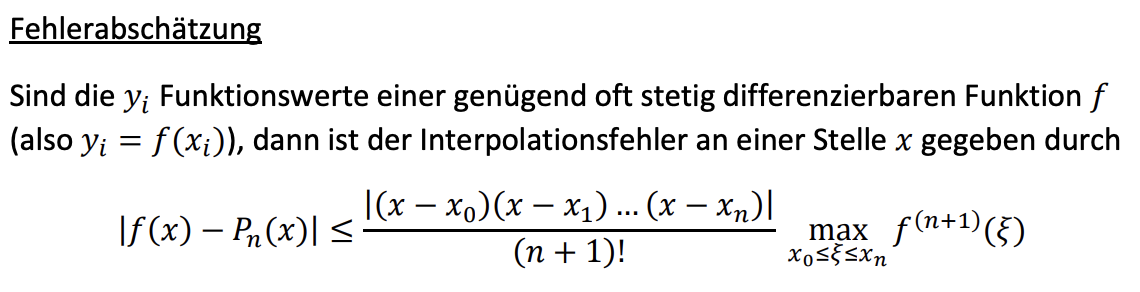

In [34]:
from IPython.display import display, Math
import numpy as np
import sympy as sp

# Beispiel-Funktion: f(x) = 2^x
def f(x):
    return 2 ** x

def f_derivative(f, n):
    x_sym = sp.symbols('x')
    f_sym = f(x_sym)
    for k in range(1, n + 2):  # Geht von der ersten bis zur (n+1)-ten Ableitung
        f_nth_derivative = sp.diff(f_sym, x_sym, k)
        f_nth_derivative_func = sp.lambdify(x_sym, f_nth_derivative, 'numpy')
        # Ausgabe der k-ten Ableitung in LaTeX
        display(Math(f"\\frac{{d^{k}}}{{dx^{k}}}f(x) = " + sp.latex(f_nth_derivative)))
        if k == n + 1:  # Nur die (n+1)-te Ableitungsfunktion wird zurückgegeben
            return f_nth_derivative_func

def max_derived_value_in_interval(f, x0, xn, n):
    x_values = np.linspace(x0, xn, 100)  # Erzeugt 100 Punkte im Intervall [x0, xn]
    f_n_plus_1_derivative_func = f_derivative(f, n)
    max_value = np.max(np.abs(f_n_plus_1_derivative_func(x_values)))
    # Ausgabe des maximalen Werts der (n+1)-ten Ableitung
    display(Math(f"\\max\\left|f^{{({n+1})}}(x)\\right|_{{[{x0}, {xn}]}} = {max_value}"))
    return max_value

def produkt_der_differenzen(x, x_i):
    produkt = 1
    for xi in x_i:
        produkt *= (x - xi)
    # Ausgabe des Produkts der Differenzen in LaTeX
    produkt_str = " * ".join([f"(x - {xi})" for xi in x_i])
    display(Math(f"\\text{{Produkt der Differenzen: }} {produkt_str} = {produkt}"))
    return produkt

def fehlerabschaetzung(x, x_i, max_f_n_plus_1):
    n = len(x_i) - 1
    produkt = produkt_der_differenzen(x, x_i)
    fehler = abs(produkt) * max_f_n_plus_1 / np.math.factorial(n + 1)
    # Ausgabe des geschätzten Fehlers und der Fakultät in LaTeX
    display(Math(f"\\text{{Geschätzter Fehler bei }} x = {x}: \\quad \\frac{{|{produkt}| \\cdot {max_f_n_plus_1}}}{{{n+1}!}} = {fehler}"))
    return fehler

# Beispielwerte
x_i = np.array([-1, 1, 3])  # Interpolationspunkte
x = 2  # Punkt, an dem der Fehler geschätzt wird

# Berechnung des Maximums der (n+1)-ten Ableitung im Intervall
max_f_n_plus_1 = max_derived_value_in_interval(f, x_i[0], x_i[-1], len(x_i) - 1)

# Fehlerabschätzung
fehler = fehlerabschaetzung(x, x_i, max_f_n_plus_1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/var/folders/2s/dfn7s3d93xb1dj4229g62lww0000gn/T/ipykernel_28364/829301803.py:40: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  fehler = abs(produkt) * max_f_n_plus_1 / np.math.factorial(n + 1)


<IPython.core.display.Math object>